In [1]:
!sudo apt-get install -y fonts-nanum # font nanum 을 컴퓨터에 다운 받는다
!sudo fc-cache -fv # 폰트 추가 후 폰트 캐시를 재 생성하여 추가 폰트를 사용 가능하게 함
!rm ~/.cache/matplotlib -rf # matplotlib 의 캐시를 제거

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
#판다스
import pandas as pd
#시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#데이터 불러오기

In [3]:
#data 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/event_log.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


# 기본적인 데이터 살펴보기

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [6]:
df[['price']].describe()

,price
count,885129.000000
mean,146.328713
std,296.807683
min,0.220000
25%,26.460000
50%,65.710000
75%,190.490000
max,64771.060000


In [7]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [8]:
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)

In [9]:
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format=('%Y-%m-%d'))

In [10]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,2020-09-24


In [11]:
df = df.loc[(df['event_date'] > '2020-09-30')]

In [12]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01


# 일별 유저수

In [13]:
df2 = df.groupby('event_date')['user_id'].nunique()
df2.head()

event_date
2020-10-01    2699
2020-10-02    2559
2020-10-03    2162
2020-10-04    2398
2020-10-05    2832
Name: user_id, dtype: int64

In [14]:
dau_data = pd.DataFrame({'event_date':df2.index , 'user_count':df2.values})

In [15]:
dau_data.head()

,event_date,user_count
0,2020-10-01,2699
1,2020-10-02,2559
2,2020-10-03,2162
3,2020-10-04,2398
4,2020-10-05,2832


In [16]:
dau_data.describe()

,user_count
count,151.000000
mean,2984.854305
std,472.763921
min,1370.000000
25%,2683.500000
50%,2943.000000
75%,3308.500000
max,4287.000000


Text(0, 0.5, '유저수')

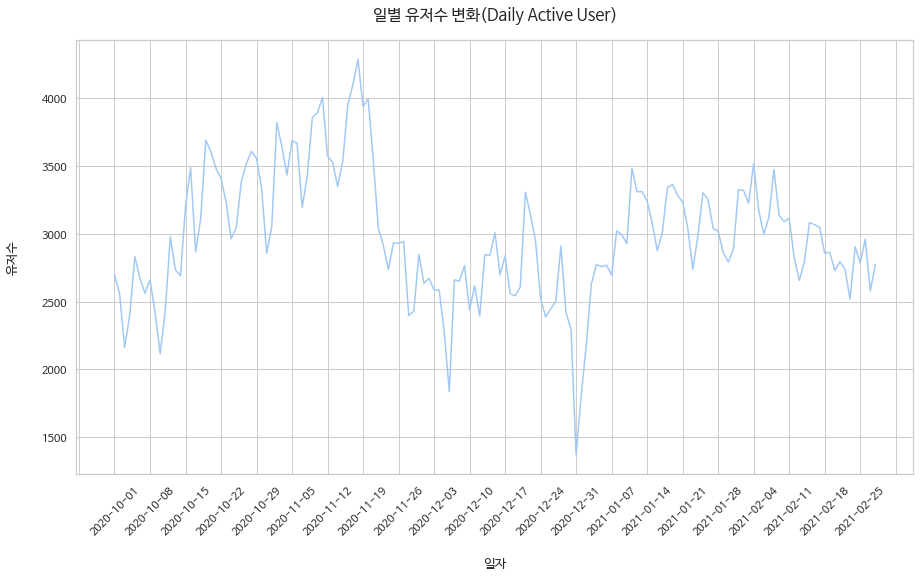

In [17]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot (x='event_date', y='user_count', data=dau_data)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))
g.set_title('일별 유저수 변화(Daily Active User)', pad=20, size=16)

g.set_xlabel('일자',labelpad = 20, size = 13)
g.set_ylabel('유저수', labelpad = 20, size = 13)


# 주차별 유저수

In [18]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01


In [20]:
df['week_number'] = df.event_date_dtm_format.dt.strftime('%Y-w%U')

In [21]:
df['week_number'].head()

28074    2020-w39
28075    2020-w39
28076    2020-w39
28077    2020-w39
28078    2020-w39
Name: week_number, dtype: object

In [22]:
df2 = df.groupby('week_number')['user_id'].nunique()

In [23]:
df2.head()

week_number
2020-w39     7141
2020-w40    16633
2020-w41    19305
2020-w42    22179
2020-w43    21956
Name: user_id, dtype: int64

In [25]:
wau_data = pd.DataFrame({'week_number':df2.index, 'user_count': df2.values})

In [26]:
wau_data.head()

,week_number,user_count
0,2020-w39,7141
1,2020-w40,16633
2,2020-w41,19305
3,2020-w42,22179
4,2020-w43,21956


In [27]:
wau_data.describe()

,user_count
count,24.000000
mean,17555.083333
std,5837.987920
min,2775.000000
25%,16738.000000
50%,18778.500000
75%,20581.750000
max,25600.000000


Text(0, 0.5, '유저수')

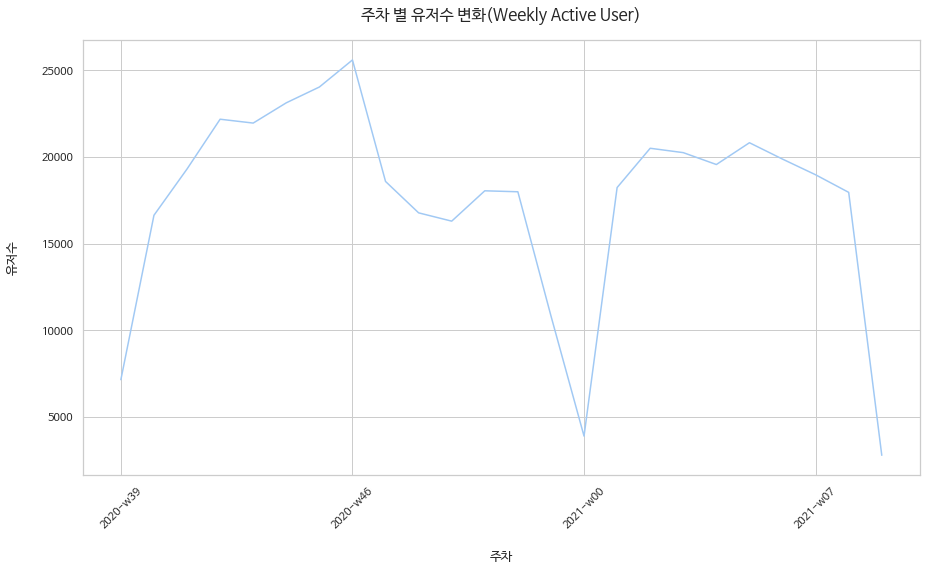

In [28]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot (x='week_number', y='user_count', data=wau_data)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))
g.set_title('주차 별 유저수 변화(Weekly Active User)', pad=20, size=16)

g.set_xlabel('주차',labelpad = 20, size = 13)
g.set_ylabel('유저수', labelpad = 20, size = 13)

In [30]:
df3 = df.groupby('week_number')['event_date'].nunique()
df3

week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    5
2021-w00    2
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [35]:
old_week_number = '2020-w52'
new_week_number = '2021-w00'
df.loc[df.week_number == old_week_number, 'week_number'] = new_week_number

In [39]:
week_data = df.loc[(df.week_number != '2020-w39'),:]

In [41]:
week_data = week_data.loc[week_data.week_number != '2021-w09']

In [42]:
week_data.groupby('week_number')['event_date'].nunique()

week_number
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2021-w00    7
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
Name: event_date, dtype: int64

In [45]:
wau = week_data.groupby('week_number')['user_id'].nunique()
wau.head()

week_number
2020-w40    16633
2020-w41    19305
2020-w42    22179
2020-w43    21956
2020-w44    23126
Name: user_id, dtype: int64

In [46]:
wau_data = pd.DataFrame({'week_number': wau.index, 'user_count': wau.values})
wau_data.head()

,week_number,user_count
0,2020-w40,16633
1,2020-w41,19305
2,2020-w42,22179
3,2020-w43,21956
4,2020-w44,23126


(0.0, 28000.0)

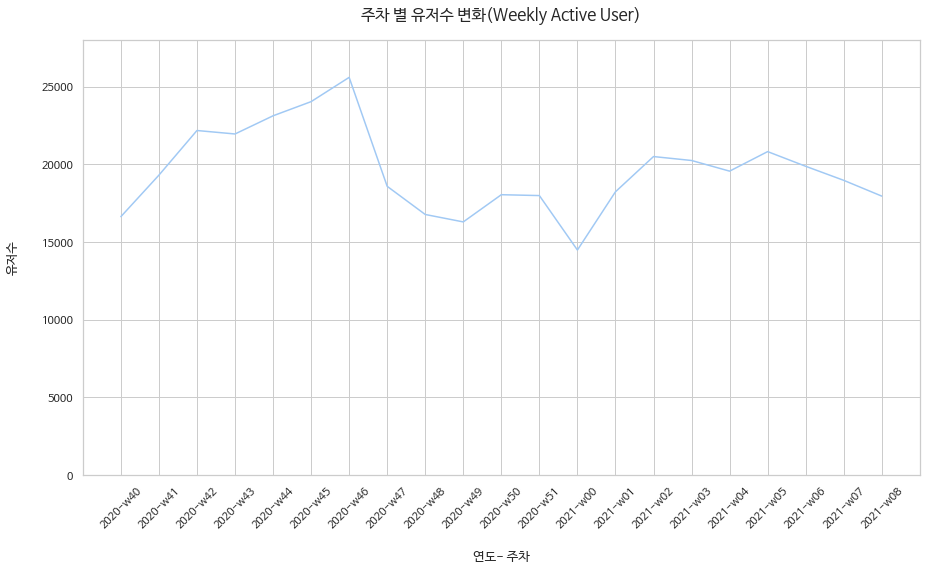

In [48]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot (x='week_number', y='user_count', data=wau_data)
g.figure.set_size_inches(15,8)
g.set_title('주차 별 유저수 변화(Weekly Active User)', pad=20, size=16)

g.set_xlabel('연도- 주차',labelpad = 20, size = 13)
g.set_ylabel('유저수', labelpad = 20, size = 13)

g.set_ylim(0,28000)


# 월별 유저수

In [49]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,week_number
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01 00:00:00,2020-w39
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01 00:00:00,2020-w39
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01 00:00:00,2020-w39
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01 00:00:00,2020-w39
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01 00:00:00,2020-w39


In [53]:
df['event_month'] = df['event_time'].str.slice(start=0, stop=7)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,week_number,event_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01 00:00:00,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01 00:00:00,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01 00:00:00,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01 00:00:00,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01 00:00:00,2020-w39,2020-10


In [55]:
df2 = df.groupby('event_month')['user_id'].nunique()

In [56]:
df2.head()

event_month
2020-10    84216
2020-11    92600
2020-12    72137
2021-01    81256
2021-02    74606
Name: user_id, dtype: int64

In [57]:
mau_data = pd.DataFrame({'event_month': df2.index, 'user_count': df2.values})
mau_data.head()

,event_month,user_count
0,2020-10,84216
1,2020-11,92600
2,2020-12,72137
3,2021-01,81256
4,2021-02,74606


Text(0, 0.5, '유저수')

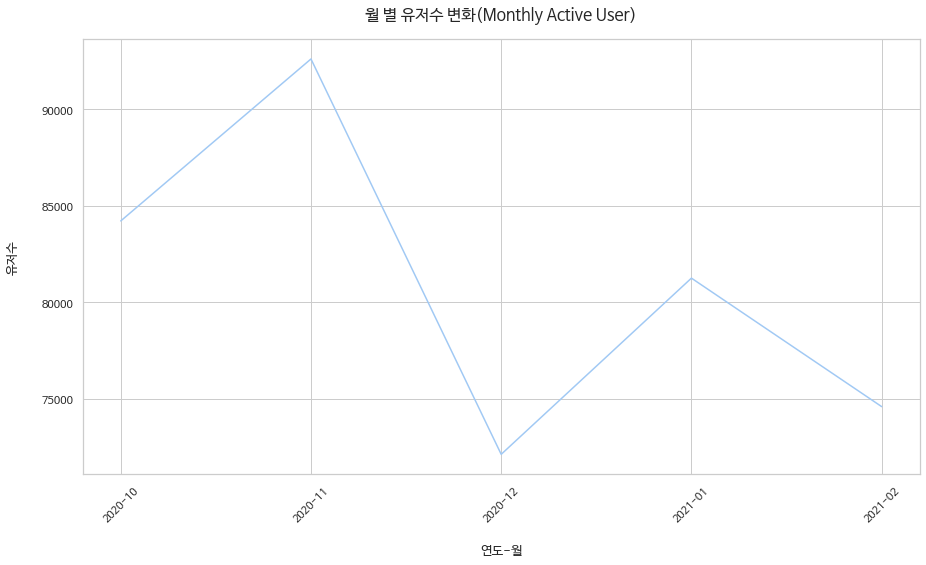

In [58]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot (x='event_month', y='user_count', data=mau_data)
g.figure.set_size_inches(15,8)
g.set_title('월 별 유저수 변화(Monthly Active User)', pad=20, size=16)

g.set_xlabel('연도-월',labelpad = 20, size = 13)
g.set_ylabel('유저수', labelpad = 20, size = 13)

# DAU/MAU

In [59]:
dau_data.user_count.mean()

2984.8543046357618

In [60]:
mau_data.user_count.mean()

80963.0

In [61]:
dau_mean = dau_data.user_count.mean()
mau_mean = mau_data.user_count.mean()

In [62]:
dau_mau_ratio = dau_mean / mau_mean
print(dau_mau_ratio)

0.03686689357651966
